In [82]:
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
import os
import numpy as np
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr

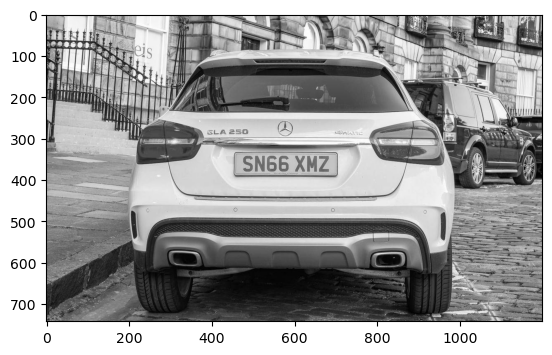

In [106]:
img = cv.imread('image7.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(gray, cv.COLOR_BGR2RGB))

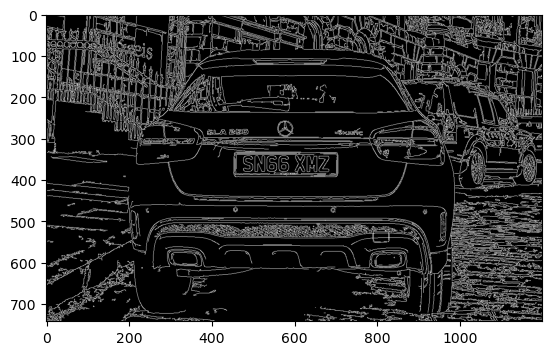

In [107]:
nrfilter = cv.bilateralFilter(gray, 11, 17, 17)
edged = cv.Canny(nrfilter, 30, 200)
plt.imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

In [108]:
keypoints = cv.findContours(edged.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv.contourArea, reverse=True)[:10]

In [109]:
location = None
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [110]:
location

In [111]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv.drawContours(mask, [location], 0,255, -1)
new_image = cv.bitwise_and(img, img, mask=mask)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2632: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


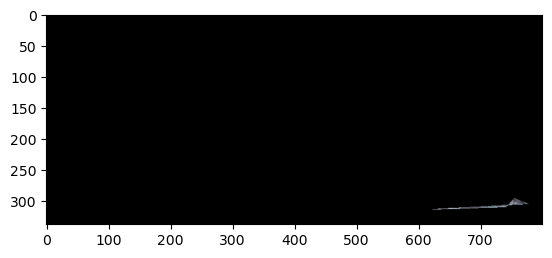

In [89]:
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))

In [90]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

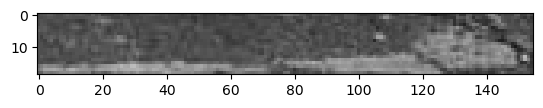

In [91]:
plt.imshow(cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB))

In [92]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

In [93]:
text = result[0][-2]
font = cv.FONT_HERSHEY_SIMPLEX
res = cv.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv.LINE_AA)
res = cv.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))

IndexError: list index out of range